# Testing the ALeRCE forecasting tool

Francisco Förster 

Last modification: `20210120`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Load the ALeRCE client 
https://alerce.readthedocs.io/en/latest/ 
(API http://api.alerce.online/ztf/v1)

In [2]:
#!pip install alerce

In [3]:
from alerce.core import Alerce
alerce = Alerce()

# Select a SN

In [4]:
oid = "ZTF19abahvdh" #"ZTF21aaqftuq"

In [5]:
from astropy.time import Time
nt = Time.now()
search_radius=30
dataframe = alerce.query_objects(
    ra=220,
    dec=0,
    lastmjd=[nt.mjd-365./2,nt.mjd],
    radius=search_radius*3600,
    classifier='stamp_classifier',
    class_name='SN',
    page_size=200,
    count='False'
)

In [6]:
alerce.query_objects(oid=oid, format='pandas')

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF19abahvdh,27,135,58652.172269,58705.165648,False,False,25,-0.205154,None,...,58705.165648,52.99338,232.864384,7.095238,0.000024,0.00003,None,None,None,corr_bulk_0.0.1


# Check in ALeRCE explorer

In [7]:
from IPython.core.display import display, HTML
display(HTML("<a href=\"https://dev.alerce.online/object/%s\">%s</a>" % (oid, oid)))
# control-left click to open in new tab

# Query object statistics

Let's look at the `object` table using the `query_objects` function. Note that `oid` is a unique identifier per object, as reported by ZTF. Also, note that the `meanra` and `meandec` fields show the mean of the right ascension and declination.

In [8]:
alerce.query_objects(oid=oid, format='pandas')

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF19abahvdh,27,135,58652.172269,58705.165648,False,False,25,-0.205154,None,...,58705.165648,52.99338,232.864384,7.095238,0.000024,0.00003,None,None,None,corr_bulk_0.0.1


# Query object band dependent statistics

Let's query some filter dependent statistics from the `magstats` table using the `query_magstats` function. Note that `fid` is a unique identifier per filter (`fid=1` for g band and `fid=2` for r band).

In [9]:
alerce.query_magstats(oid=oid, format='pandas')

,fid,stellar,corrected,ndet,ndubious,magmean,magmedian,magmax,magmin,magsigma,maglast,magfirst,firstmjd,lastmjd,step_id_corr
0,1,False,False,11,0,18.913940,18.838703,19.8553,18.138979,None,19.845331,19.8553,58652.170,58692.190,bulk_version_0.0.1
1,2,False,False,14,0,19.044666,19.071957,20.1245,18.344133,None,19.691998,20.1245,58652.293,58705.164,bulk_version_0.0.1


# Get light curve

Now we will get the object's light curve of detections (from the `detection` table) and non-detections (from the `non-detection` table) using the `query_detections` and `query_non_detections` functions, respectively. Note that `candid` is a unique identifier per detection.

In [10]:
# Getting detections for an object
det = alerce.query_detections(oid, format="pandas")
det.head()

,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magpsf_corr,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,58652.172269,898172265915015003,1,898172265915,19.591700,1,898,3.101610,19.855300,None,...,19.7412,0.6077,NaN,False,False,False,None,bulk_1.0.0,None,920204945915015004
1,58652.292697,898292695915015003,2,898292695915,19.592000,1,898,2.392100,20.124500,None,...,19.0745,0.3604,NaN,False,False,False,None,bulk_1.0.0,None,920204945915015004
2,58655.192130,901192125915015004,2,901192125915,20.360611,1,901,2.802778,19.360770,None,...,19.1880,0.1500,480120259.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
3,58655.231933,901231935915015006,1,901231935915,20.553211,1,901,2.999988,19.257492,None,...,19.2263,0.1062,480120159.0,False,False,False,None,bulk_1.0.0,None,920204945915015004
4,58658.211331,904211335915015003,1,904211335915,20.703148,1,904,2.865873,18.606083,None,...,18.6431,0.0760,480120159.0,False,False,False,None,bulk_1.0.0,None,920204945915015004


In [11]:
# Getting non detections for an object
non_det = alerce.query_non_detections(oid, format="pandas")
non_det.head()

,mjd,fid,diffmaglim
0,58633.297870,2,20.5317
1,58636.211343,2,20.5167
2,58636.273090,1,20.9806
3,58639.252338,1,20.7302
4,58639.273032,2,20.5695


# Plot stamps

Let's look at the image stamps using the `plot_stamps` function. By default it uses the first available stamp.

In [12]:
alerce.plot_stamps(oid)

You can also select an arbitrary detection. Let's look at the peak magnitude stamp giving the `candid` associated to the minimum magnitude.

In [13]:
alerce.plot_stamps(oid=oid, candid=det.candid.loc[det.magpsf.idxmin()])

# Plot light curve

Let's plot the light curve

Text(0, 0.5, 'mag')

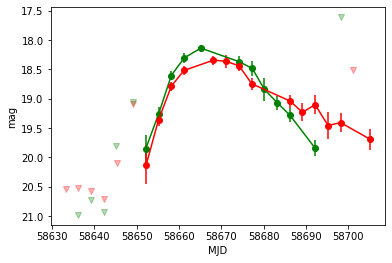

In [14]:
fig, ax = plt.subplots()
colors = {1: 'g', 2: 'r'}
for fid in det.fid.unique():
    mask = det.fid == fid
    ax.errorbar(det.loc[mask].mjd, det.loc[mask].magpsf, yerr=det.loc[mask].sigmapsf, c=colors[fid], marker='o')
for fid in non_det.fid.unique():
    mask = non_det.fid == fid
    ax.scatter(non_det.loc[mask].mjd, non_det.loc[mask].diffmaglim, c=colors[fid], marker='v', alpha=0.3)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD")
ax.set_ylabel("mag")

# Forecasting

All objects with at least six detections in ZTF are automatically fitted with a parametric model by the ALeRCE pipeline. The model is a modified version from Villar et al. 2019, relevant for supernova-like objects.

* Modified model from Villar et al. 2019

$$
\Large
F = \begin{cases}
        \cfrac{A \left(1 - \beta' \frac{t - t_0}{t_1 - t_0}\right)}{1 + \exp{\left(-\frac{t - t_0}{\tau_{\rm rise}}\right)}} & \mbox{if} \; t < t_1  \\ 
        \\
        \cfrac{A (1 - \beta') \exp{\left(-\frac{t - t_1}{\tau_{\rm fall}}\right)}}{1 + \exp{\left(-\frac{t - t_0}{\tau_{\rm rise}}\right)}} & \mbox{if} \; t \ge t_1,
  \end{cases}
$$

* Compare with Villar et al. 2019

![](figures/Villar+19.png)

The best fitting parameters can be accessed from `feature` table, using the `query_features` function.

In [15]:
features = alerce.query_features(oid, format="pandas")
features.head()

,name,value,fid,version
0,gal_b,47.123631,0,lc_classifier_1.2.1-P
1,gal_l,12.576955,0,lc_classifier_1.2.1-P
2,g-r_max,-0.205154,12,lc_classifier_1.2.1-P
3,g-r_mean,-0.141795,12,lc_classifier_1.2.1-P
4,g-r_max_corr,NaN,12,lc_classifier_1.2.1-P


Let's look at all the available features (we use unique as some features are given per filter).

In [16]:
", ".join(features.name.unique())

'gal_b, gal_l, g-r_max, g-r_mean, g-r_max_corr, g-r_mean_corr, rb, MHPS_ratio, MHPS_low, MHPS_high, MHPS_non_zero, MHPS_PN_flag, iqr, Amplitude, AndersonDarling, Autocor_length, Beyond1Std, Con, Eta_e, Gskew, MaxSlope, Mean, Meanvariance, MedianAbsDev, MedianBRP, PairSlopeTrend, PercentAmplitude, Q31, Rcs, Skew, SmallKurtosis, Std, StetsonK, Pvar, ExcessVar, SF_ML_amplitude, SF_ML_gamma, IAR_phi, LinearTrend, delta_mag_fid, delta_mjd_fid, first_mag, mean_mag, min_mag, n_det, n_neg, n_pos, positive_fraction, n_non_det_before_fid, max_diffmaglim_before_fid, median_diffmaglim_before_fid, last_diffmaglim_before_fid, last_mjd_before_fid, dmag_non_det_fid, dmag_first_det_fid, n_non_det_after_fid, max_diffmaglim_after_fid, median_diffmaglim_after_fid, SPM_A, SPM_t0, SPM_gamma, SPM_beta, SPM_tau_rise, SPM_tau_fall, SPM_chi, Multiband_period, PPE, Period_band, delta_period, Power_rate_1/4, Power_rate_1/3, Power_rate_1/2, Power_rate_2, Power_rate_3, Power_rate_4, Psi_CS, Psi_eta, Harmonics_mag_1

All the SPM_xx features are associated to the supernova parametric model shown above. Let's have a look at them:

In [17]:
features.loc[features.name.isin(["SPM_tau_rise", "SPM_tau_fall", "SPM_t0",
                                 "SPM_gamma", "SPM_chi", "SPM_beta", "SPM_A"])]

,name,value,fid,version
109,SPM_A,0.249661,1,lc_classifier_1.2.1-P
110,SPM_t0,2.824984,1,lc_classifier_1.2.1-P
111,SPM_gamma,17.062072,1,lc_classifier_1.2.1-P
112,SPM_beta,0.361050,1,lc_classifier_1.2.1-P
113,SPM_tau_rise,2.927568,1,lc_classifier_1.2.1-P
114,SPM_tau_fall,12.768163,1,lc_classifier_1.2.1-P
115,SPM_chi,0.054587,1,lc_classifier_1.2.1-P
116,SPM_A,0.258165,2,lc_classifier_1.2.1-P
117,SPM_t0,4.817869,2,lc_classifier_1.2.1-P
118,SPM_gamma,19.794919,2,lc_classifier_1.2.1-P


Note that these values are given per filter. Also, note that the `SPM_A` is a flux stored in numerically convenient units (see Sánchez-Sáez et al. 2021).

# Forecast API 

https://api.alerce.online/forecast/v1/parametric/sn

A beta forecasting tool API is available in the address shown above. This first version can do forecasting based on the parametric model shown before. The inputs parameters for the API are the unique object's ID, `oid`, and the time in modified Julian date `mjd`. Let's create a function to get forecasts for a list of `mjd` times.

In [18]:
def get_forecasts(oid, times):
    print("Getting forecasts for %s..." % oid)
    forecasts = []
    url = "https://api.alerce.online/forecast/v1/parametric/sn?oid=%s&%s" % (oid, "&".join(["mjd=%s" % mjd for mjd in times]))
    print(url)
    response = requests.get(url)
    print(response.json())
    return pd.DataFrame(response.json()["forecast"]).apply(pd.Series.explode)

And a function to plot the detections, non-detections, and forecasts together:

In [19]:
def plot_SN(oid, det, non_det, pred):
    fig, ax = plt.subplots()
    colors = {1: 'g', 2: 'r'}
    for fid in det.fid.unique():
        mask = det.fid == fid
        ax.errorbar(det.loc[mask].mjd, det.loc[mask].magpsf, yerr=det.loc[mask].sigmapsf, c=colors[fid], marker='o', lw=0, elinewidth=1)
        mask_f = pred.fid == fid
        ax.plot(pred.loc[mask_f].mjd.values, np.array(pred.loc[mask_f].magpsf.values), c=colors[fid], ls=":")
    if not non_det.empty:
        for fid in non_det.fid.unique():
            mask = non_det.fid == fid
            ax.scatter(non_det.loc[mask].mjd, non_det.loc[mask].diffmaglim, c=colors[fid], marker='v', alpha=0.3)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("MJD")
    ax.set_ylabel("mag")
    ax.set_title(oid)
    plt.show()
    plt.close()

Let's combine both functions

In [20]:
def show_forecast(oid):
    det = alerce.query_detections(oid, format="pandas")
    non_det = alerce.query_non_detections(oid, format="pandas")
    times = np.linspace(det.mjd.min() - 10, det.mjd.max() + 30, 10)
    pred = get_forecasts(oid, times)
    plot_SN(oid, det, non_det, pred)

And let's test it

Getting forecasts for ZTF19abahvdh...
https://api.alerce.online/forecast/v1/parametric/sn?oid=ZTF19abahvdh&mjd=58642.172268500086&mjd=58652.50486623341&mjd=58662.83746396672&mjd=58673.170061700046&mjd=58683.50265943337&mjd=58693.835257166684&mjd=58704.167854900006&mjd=58714.50045263333&mjd=58724.833050366644&mjd=58735.165648099966
{'oid': 'ZTF19abahvdh', 'forecast': [{'magpsf': [22.415568692559958, 19.158208369420393, 18.148365895617676, 18.46730872543773, 19.35394617215102, 20.244256867460862, 21.123335682154227, 22.00193043499295, 22.88055084469322, 23.759178564256512], 'mjd': [58642.172268500086, 58652.50486623341, 58662.83746396672, 58673.170061700046, 58683.50265943337, 58693.835257166684, 58704.167854900006, 58714.50045263333, 58724.833050366644, 58735.165648099966], 'fid': 1}, {'magpsf': [21.459688288777187, 19.244140501613437, 18.30828618714584, 18.616063675282902, 19.07869652032422, 19.39414428713842, 19.73837091195395, 20.086880582951625, 20.435723421725093, 20.78458792145583

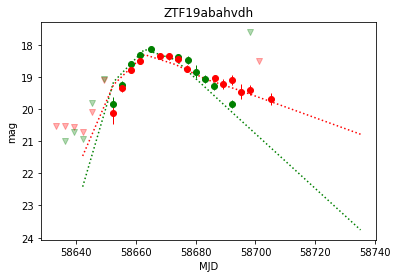

In [21]:
show_forecast(oid)